<a href="https://colab.research.google.com/github/GagraniV/WiDS2023/blob/main/VJ_WiDS_Jan132023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np 
import pandas as pd 
from random import random
import csv
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.style.use('ggplot')
import seaborn as sns
from datetime import datetime
from scipy import stats

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer

import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#!pip install wandb
#import wandb

Download complete and/or subset of the dataset. 
Upload dataset https://towardsdatascience.com/7-ways-to-load-external-data-into-google-colab-7ba73e7d5fc7


In [ ]:
trn_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/train_data.csv')
tst_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/test_data.csv')

In [19]:
trn_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/train_data.csv',nrows =1000)
tst_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/test_data.csv',nrows =1000)

In [ ]:
np.random.seed(222)
trn_df=pd.read_csv('/content/drive/MyDrive/Kaggle2023/train_data.csv', skiprows=lambda x: x > 0 and random() >=0.05)
tst_df=pd.read_csv('/content/drive/MyDrive/Kaggle2023/test_data.csv', skiprows=lambda x: x > 0 and random() >=0.05)

In [ ]:
with open('/content/drive/MyDrive/Kaggle2023/train_data.csv', 'r') as fin:
    reader = csv.reader(fin)
    rows = [l for l in reader if random() >= 0.99]
    trn_df = pd.DataFrame(rows)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#to unmount
drive.flush_and_unmount()

In [ ]:
%cd drive/MyDrive/Kaggle2023
#trn_df= pd.read_csv('train_data.csv')

/content/drive/MyDrive/Kaggle2023


In [ ]:
display(trn_df.head(n=25).style.set_caption('Train data'))

In [ ]:
trn_df.filter(regex='^contest',axis=1).head()

,contest-pevpr-sfc-gauss-14d__pevpr,contest-wind-h10-14d__wind-hgt-10,contest-rhum-sig995-14d__rhum,contest-wind-h100-14d__wind-hgt-100,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500
0,237.00,31246.63,81.72,16666.81,28.744480,101352.08,4.41,98644.97,-2.56,42.45,-3.52,94.31,1535.52,-5.22,5899.66
1,228.90,31244.78,82.56,16667.31,28.370585,101396.02,3.74,98686.80,-2.39,42.66,-4.49,100.85,1538.00,-5.20,5901.03
2,220.69,31239.27,83.29,16668.39,28.133059,101429.25,3.40,98712.85,-2.76,43.23,-5.44,101.25,1540.32,-5.00,5902.18
3,225.28,31232.86,83.26,16667.39,28.256798,101440.85,3.29,98711.70,-3.00,43.11,-5.76,101.90,1541.10,-4.61,5903.07
4,237.24,31226.16,82.50,16665.65,28.372353,101419.53,3.27,98686.46,-3.40,42.98,-6.09,82.95,1539.73,-4.25,5903.36


In [ ]:
#file containing most recent monthly temprature NMME model forecasts for tmp2m 
trn_df.filter(regex = '^nmme0-tmp2m',axis=1).head(n =6)

,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean
0,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46
1,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46
2,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46
3,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46
4,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46
5,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46


In [ ]:
trn_df.filter(regex = '^cancm30',axis=1).head(n =6)

,cancm30
0,30.18
1,30.18
2,30.18
3,30.18
4,30.18
5,29.02


In [ ]:
len(trn_df.columns)

246

In [ ]:
trn_df.columns

Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=246)

In [ ]:
tst_df.columns

Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=245)

In [ ]:
trn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18652 entries, 0 to 18651
Columns: 246 entries, index to wind-vwnd-925-2010-20
dtypes: float64(240), int64(4), object(2)
memory usage: 35.0+ MB


https://www.kaggle.com/competitions/widsdatathon2023/data

In [ ]:
trn_df.dtypes

index                                         int64
lat                                         float64
lon                                         float64
startdate                                    object
contest-pevpr-sfc-gauss-14d__pevpr          float64
nmme0-tmp2m-34w__cancm30                    float64
nmme0-tmp2m-34w__cancm40                    float64
nmme0-tmp2m-34w__ccsm30                     float64
nmme0-tmp2m-34w__ccsm40                     float64
nmme0-tmp2m-34w__cfsv20                     float64
nmme0-tmp2m-34w__gfdlflora0                 float64
nmme0-tmp2m-34w__gfdlflorb0                 float64
nmme0-tmp2m-34w__gfdl0                      float64
nmme0-tmp2m-34w__nasa0                      float64
nmme0-tmp2m-34w__nmme0mean                  float64
contest-wind-h10-14d__wind-hgt-10           float64
nmme-tmp2m-56w__cancm3                      float64
nmme-tmp2m-56w__cancm4                      float64
nmme-tmp2m-56w__ccsm3                       float64
nmme-tmp2m-5

In [ ]:
tst_df.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
count,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,...,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000
mean,391410.500000,0.592766,0.517964,299.244395,19.363234,21.195801,19.204389,20.140415,18.261659,20.396613,...,22.030820,-34.379016,25.485902,36.913279,-21.290328,10.448689,-12.676885,8.211967,-11.478033,21.083770
std,9051.264507,0.251748,0.272063,117.029504,7.310349,7.151861,7.146665,6.169318,5.539982,7.087798,...,30.914333,24.479350,30.720523,17.083142,22.336810,8.557387,29.438632,29.897845,18.660838,16.841297
min,375734.000000,0.000000,0.000000,32.820000,1.550000,2.900000,1.170000,3.530000,1.840000,0.080000,...,-19.900000,-76.450000,-29.250000,6.500000,-59.540000,-5.450000,-66.770000,-32.150000,-53.690000,-16.560000
25%,383572.250000,0.409091,0.300000,215.962500,14.060000,16.140000,14.440000,15.840000,14.660000,15.540000,...,2.220000,-56.070000,3.630000,19.570000,-39.340000,4.720000,-30.630000,-18.360000,-23.150000,13.420000
50%,391410.500000,0.590909,0.533333,292.915000,19.940000,21.720000,19.325000,20.150000,18.210000,20.340000,...,14.700000,-31.070000,22.740000,37.090000,-21.420000,10.660000,-22.640000,0.150000,-13.950000,21.090000
75%,399248.750000,0.818182,0.766667,371.330000,24.610000,26.810000,24.760000,24.890000,22.180000,25.730000,...,34.300000,-15.510000,44.690000,49.660000,-0.790000,17.090000,14.420000,28.840000,-0.470000,32.410000
max,407087.000000,1.000000,1.000000,740.170000,36.080000,36.030000,32.970000,33.910000,35.310000,37.420000,...,116.770000,25.330000,79.610000,71.270000,14.150000,29.000000,33.350000,74.130000,28.270000,51.450000


In [ ]:
#convert into pandas datetime object
trn_df.startdate = pd.to_datetime(trn_df.startdate)
tst_df.startdate = pd.to_datetime(tst_df.startdate)
trn_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,2014-09-02,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,2014-09-03,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,2014-09-04,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,2014-09-05,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [ ]:
# StartDate
print(min(trn_df.startdate), max(trn_df.startdate))

2014-09-01 00:00:00 2016-08-31 00:00:00


In [ ]:
trn_df.describe().style.background_gradient(cmap="Pastel1")

In [20]:
missing_columns = [col for col in trn_df.columns if trn_df[col].isnull().any()]
missingvalues_count =trn_df.isna().sum()
missingValues_df = pd.DataFrame(missingvalues_count.rename('Null Values Count')).loc[missingvalues_count.ne(0)]
missingValues_df .style.background_gradient(cmap="Pastel1")

,Null Values Count
nmme0-tmp2m-34w__ccsm30,31
nmme-tmp2m-56w__ccsm3,20
nmme-prate-34w__ccsm3,17
nmme0-prate-56w__ccsm30,31
nmme0-prate-34w__ccsm30,31
nmme-prate-56w__ccsm3,20
nmme-tmp2m-34w__ccsm3,17
ccsm30,31


In [ ]:
#group start_date by month and check averages of the other columns
#trn_df.groupby(pd.Grouper(key='startdate',freq='M')).mean()

contest-tmp2m-14d__tmp2m, the arithmetic mean of the max and min observed temperature over the next 14 days for each location and start date, is provided

In [21]:
# Set up train and test DataFrames
# separate tmp2m, the target variable from the features
x_trn = trn_df.drop(['contest-tmp2m-14d__tmp2m'], axis=1) 
y_trn = trn_df['contest-tmp2m-14d__tmp2m']

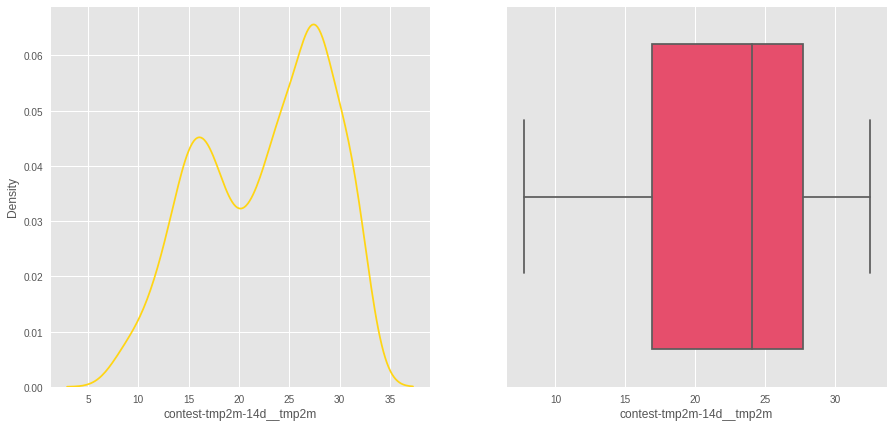

In [22]:
plt.figure(figsize=(15, 7))
plt.subplot(121)
sns.kdeplot(trn_df['contest-tmp2m-14d__tmp2m'] , color = "#ffd514")
plt.subplot(122)
sns.boxplot(trn_df['contest-tmp2m-14d__tmp2m'] , color = "#ff355d")

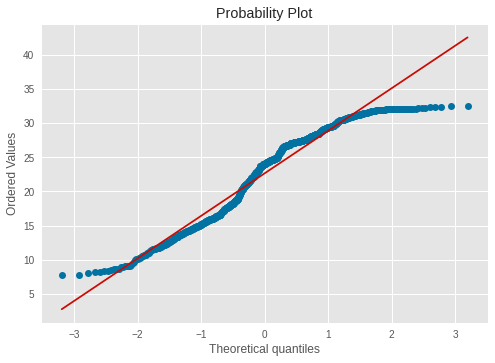

In [23]:
res = stats.probplot(trn_df['contest-tmp2m-14d__tmp2m'], plot=plt)

In [24]:
def kdeplot_features(train_df,test_df, feature, title):
    '''Takes a column from the dataframe and plots the distribution (after count).'''
    
    values_train = train_df[feature].to_numpy()
    values_test = test_df[feature].to_numpy()  
     
    plt.figure(figsize = (18, 3))
    
    sns.kdeplot(values_train, color = '#ffd514')
    sns.kdeplot(values_test, color = '#ff355d')
    
    plt.title(title, fontsize=15)
    plt.legend()
    plt.show();
    
    del values_train , values_test
    #gc.collect()
    
def countplot_features(train_df, feature, title):
    '''Takes a column from the dataframe and plots the distribution (after count).'''
    
           
    plt.figure(figsize = (10, 5))
    
    sns.countplot(trn_df[feature], color = '#ff355d')
        
    plt.title(title, fontsize=15)    
    plt.show();


In [ ]:
numerical_features = ['nmme0-tmp2m-34w__nasa0', 'nmme-tmp2m-56w__cancm3', 'nmme-tmp2m-56w__gfdlflorb','nmme-prate-34w__cancm4','nmme-prate-34w__gfdlflora']

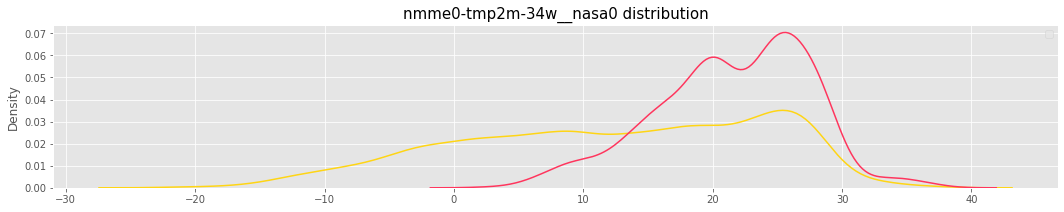

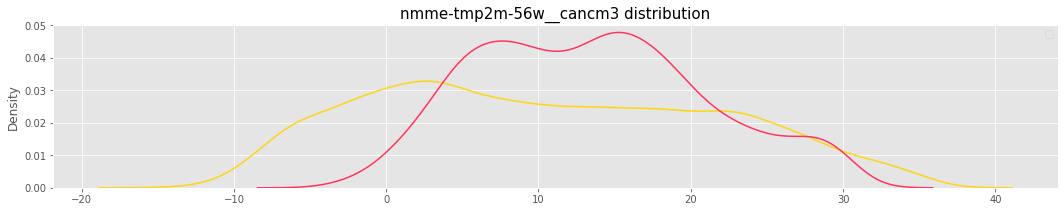

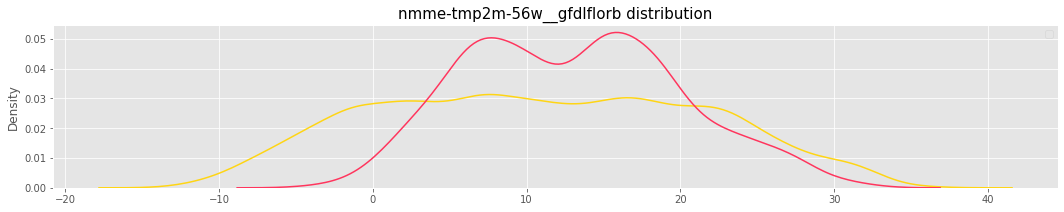

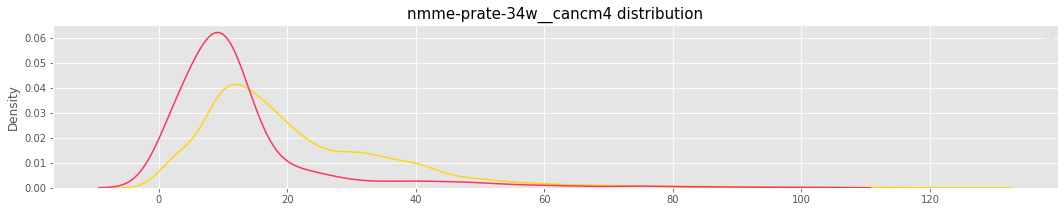

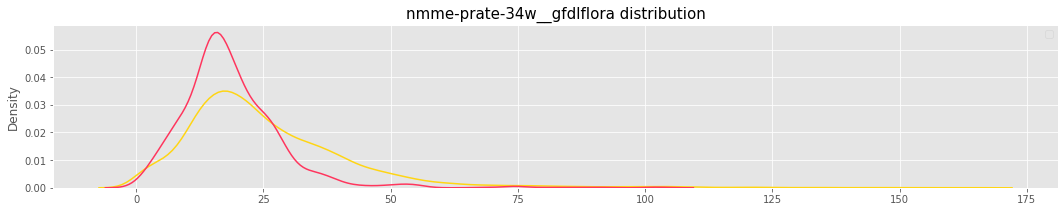

In [ ]:
for feature in numerical_features:
    kdeplot_features(trn_df,tst_df, feature=feature, title = feature + " distribution")

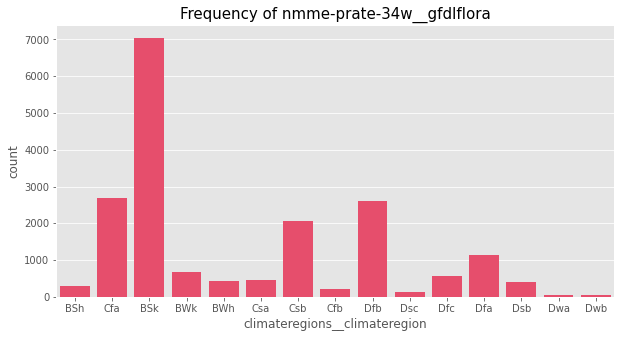

In [ ]:
countplot_features(trn_df, feature='climateregions__climateregion', title = "Frequency of "+ feature)

Feature Engineering

In [27]:
trn_df['year']=pd.DatetimeIndex(trn_df['startdate']).year 
trn_df['month']=pd.DatetimeIndex(trn_df['startdate']).month 
trn_df['day']=pd.DatetimeIndex(trn_df['startdate']).day

tst_df['year']=pd.DatetimeIndex(tst_df['startdate']).year 
tst_df['month']=pd.DatetimeIndex(tst_df['startdate']).month 
tst_df['day']=pd.DatetimeIndex(tst_df['startdate']).day

# drop the startdate column from training and test dataset

trn_df=trn_df.drop(['startdate'], axis=1)
trn_df=trn_df.drop(['index'], axis=1)

tst_df=tst_df.drop(['startdate'], axis=1)
tst_df=tst_df.drop(['index'], axis=1)

KeyError: ignored

In [28]:
le = LabelEncoder()
trn_df['climateregions__climateregion'] = le.fit_transform(trn_df['climateregions__climateregion'])
tst_df['climateregions__climateregion'] = le.transform(tst_df['climateregions__climateregion'])

X1 = trn_df.drop(columns=['contest-tmp2m-14d__tmp2m'])
y1 = trn_df['contest-tmp2m-14d__tmp2m']

# Create a list of the feature names
features = np.array(X1.columns)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X1, y1)        
visualizer.show()

NameError: ignored

In [ ]:
from yellowbrick.target import FeatureCorrelation


In [ ]:
# check unique locations provided in the dataset

unique_trn_loc = trn_df.groupby(['lat', 'lon']).size().rename('count').reset_index()
unique_trn_loc.head()

,lat,lon,count
0,0.000000,0.833333,731
1,0.000000,0.866667,731
2,0.045455,0.833333,731
3,0.045455,0.866667,731
4,0.045455,0.900000,731


In [ ]:
# 514 unique location in the dataset
len(unique_trn_loc)

514

In [ ]:
unique_tst_loc = tst_df.groupby(['lat', 'lon']).size().rename('count').reset_index()
unique_tst_loc.head()

,lat,lon,count
0,0.000000,0.833333,61
1,0.000000,0.866667,61
2,0.045455,0.833333,61
3,0.045455,0.866667,61
4,0.045455,0.900000,61


In [ ]:
len(unique_tst_loc)

514

Location Feature and issue

In [ ]:
# Concatenate train and test data
all_df = pd.concat([trn_df, tst_df], axis=0)

# Create new feature
all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()

print(f'{all_df.loc_group.nunique()} unique locations')

# Split back up
trn_df_loc = all_df.iloc[:len(trn_df)]
tst_df_loc = all_df.iloc[len(tst_df):]

575 unique locations


Location Feture.
different locations, between training and test data
insted of 514 unique, 575 locrtions appeared 

In [ ]:
print('Locations in train that are not in test')
locations_train=list(trn_df_loc.loc_group.unique())
locations_test=list(tst_df_loc.loc_group.unique())
result_1 = list(set(locations_train).difference(locations_test))
print(result_1)

print('Locations in test that are not in train')
result_2=list(set(locations_test).difference(locations_train))
print(result_2)

Locations in train that are not in test
[33, 34, 35, 36, 37, 38, 39, 40, 41]
Locations in test that are not in train
[52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 75, 100, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 180, 209, 238, 268, 299, 329, 359, 388, 417, 446, 474, 503, 532, 558]


In [ ]:
!pip install pytorch-tabnet
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 2.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=3ce87a221d81c2d5b13315814ba3ddfa201a0ceadc3d3937d622558fa9dd6b74
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor

import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
np.random.seed(0)

import os
import wget
from pathlib import Path

ModuleNotFoundError: ignored

In [ ]:
fig = pd.line(train_data, x='startdate', 
              y='contest-tmp2m-14d__tmp2m', 
              color = 'climateregions__climateregion', 
              facet_row='climateregions__climateregion',facet_row_spacing=0.04,
              labels={"contest-tmp2m-14d__tmp2m":"temp", "climateregions__climateregion":"region"},
              template = 'plotly_white', width=1000, height=1200)

# Edit the layout
fig.update_layout(title='Mean temperature variations by assigned climate regions',
                   xaxis_title='Date',
                   )

# fig.update_xaxes(visible=False, fixedrange=True)
fig.update_yaxes(visible=True, matches=None)

# remove facet/subplot labels
fig.update_layout(annotations=[], overwrite=True)


fig.show()

AttributeError: ignored

In [ ]:
train_data['climateregions__climateregion'].value_counts(normalize = True).sort_values().plot(kind='bar', figsize=(10,4), rot=0)

plt.xlabel("climateregions", labelpad=10, fontsize=20)
plt.ylabel("Percent of data", labelpad=10, fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()
plt.title("Percent of data belonging to each climate region in the train set", y=1.02, fontsize=20)

In [ ]:
train_df.groupby('startdate')[target].count()

In [ ]:
temp = train_df.groupby(['climateregions__climateregion', 'lat', 'lon']).size().to_frame().reset_index(drop=False)
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.scatterplot(data=temp, y='lat', x='lon', hue='climateregions__climateregion', ax=ax[0])
ax[0].set_title('train data')
temp = test_df.groupby(['climateregions__climateregion', 'lat', 'lon']).size().to_frame().reset_index(drop=False)
sns.scatterplot(data=temp, y='lat', x='lon', hue='climateregions__climateregion', ax=ax[1])
ax[1].set_title('test data')
plt.show()

In [ ]:
# Concatenate train and test data
all_df = pd.concat([train_df, test_df], axis=0)

# Create new feature
all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()
display(all_df)

print(f'{all_df.loc_group.nunique()} unique locations')

# Split back up
train_df = all_df.iloc[:len(train_df)]
test_df = all_df.iloc[len(train_df):]

In [ ]:
print('Locations in train that are not in test')
print([c for c in train_df.loc_group.unique() if c not in test_df.loc_group.unique()])

print('Locations in test that are not in train')
print([c for c in test_df.loc_group.unique() if c not in train_df.loc_group.unique()])

In [ ]:
scale = 14

train_df.loc[:,'lat']=round(train_df.lat,scale)
train_df.loc[:,'lon']=round(train_df.lon,scale)

test_df.loc[:,'lat']=round(test_df.lat,scale)
test_df.loc[:,'lon']=round(test_df.lon,scale)

# Concatenate train and test data
all_df = pd.concat([train_df, test_df], axis=0)

# Create new feature
all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()
display(all_df)

print(f'{all_df.loc_group.nunique()} unique locations')

# Split back up
train_df = all_df.iloc[:len(train_df)]
test_df = all_df.iloc[len(train_df):]

print('Locations in train that are not in test')
print([c for c in train_df.loc_group.unique() if c not in test_df.loc_group.unique()])

print('Locations in test that are not in train')
print([c for c in test_df.loc_group.unique() if c not in train_df.loc_group.unique()])

In [ ]:
temp = train_df[train_df.loc_group == 0]
sns.lineplot(data=temp, x = 'startdate', y = target)
temp = train_df[train_df.loc_group == 1]
sns.lineplot(data=temp, x = 'startdate', y = target)

temp = train_df[train_df.loc_group == 3]
sns.lineplot(data=temp, x = 'startdate', y = target)

In [ ]:
#column in trainning, but not in testing
cols_with_missing = list(train_df.isnull().sum(axis=0)[train_df.isnull().sum(axis=0) > 0].index)

fig, ax = plt.subplots(1,1,figsize=(12,12))
sns.heatmap(train_df.set_index([ 'loc_group', 'startdate'])[cols_with_missing].isnull(), cmap='binary')
ax.set_title('Missing values')
plt.show()

In [ ]:
#Handle missing values
fig, ax = plt.subplots(len(cols_with_missing), 2,figsize=(12,20))

for i, col_with_missing in enumerate(cols_with_missing):
    sns.pointplot(data=train_df[train_df.loc_group ==0], x='startdate', y=col_with_missing, linewidth=1, marker='.' , ax=ax[i, 0])
    ax[i, 0].set_xlim([150, 500])

    
train_df = train_df.sort_values(by=['loc_group', 'startdate']).ffill()

for i, col_with_missing in enumerate(cols_with_missing):
    sns.pointplot(data=train_df[train_df.loc_group ==0], x='startdate', y=col_with_missing, ax=ax[i, 1], color='green')
    ax[i, 1].set_xlim([150, 500])
    
plt.tight_layout()
plt.show()

In [ ]:
#Label Encoding

le = preprocessing.LabelEncoder()
train_df['climateregions__climateregion'] = le.fit_transform(train_df['climateregions__climateregion'])
test_df['climateregions__climateregion'] = le.transform(test_df['climateregions__climateregion'])

In [ ]:
#Time Features

def create_time_features(df):
    df = df.copy()
    df['year'] = df.startdate.dt.year
    df['quarter'] = df.startdate.dt.quarter
    df['month'] = df.startdate.dt.month
    df['week'] = df.startdate.dt.weekofyear
    df['dayofyear'] = df.startdate.dt.day_of_year
    # to do : add quarter, week
    return df
train_df = create_time_features(train_df)
test_df = create_time_features(test_df)
train_df.head()

In [ ]:
def add_season(df):
    month_to_season = {
      1: 0,
      2: 0,
      3: 1,
      4: 1,
      5: 1,
      6: 2,
      7: 2,
      8: 2, 
      9: 3, 
      10: 3,
      11: 3,
      12: 0
  }
    df['season'] = df['month'].apply(lambda x: month_to_season[x])

add_season(train_df)
add_season(test_df)

In [ ]:
def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

def encode_cyclical(df):
    # encode the day with a period of 365
    df['day_of_year_sin'] = sin_transformer(365).fit_transform(df['dayofyear'])
    df['day_of_year_cos'] = cos_transformer(365).fit_transform(df['dayofyear'])

    # encode the week with a period of 52
    df['week_sin'] = sin_transformer(52).fit_transform(df['week'])
    df['week_cos'] = cos_transformer(52).fit_transform(df['week'])

    # encode the month with a period of 12
    df['month_sin'] = sin_transformer(12).fit_transform(df['month'])
    df['month_cos'] = cos_transformer(12).fit_transform(df['month'])

    # encode the season with a period of 4
    df['season_sin'] = sin_transformer(4).fit_transform(df['season'])
    df['season_cos'] = cos_transformer(4).fit_transform(df['season'])
    
    # encode the quarter with a period of 4
    df['quarter_sin'] = sin_transformer(4).fit_transform(df['quarter'])
    df['quarter_cos'] = cos_transformer(4).fit_transform(df['quarter'])

encode_cyclical(train_df)
encode_cyclical(test_df)

In [ ]:
exclude_cols = ['index', 'startdate']
features = [c for c in train_df.columns if ((c != target) & (c not in exclude_cols))]

train = train_df[train_df['startdate'] <= '2016-08-17']
val  = train_df[train_df['startdate'] > '2016-08-17']

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

train_ds = lgb.Dataset(X_train, label = y_train)
valid_ds = lgb.Dataset(X_val, label = y_val)
params = {
    'metric': 'rmse',
    'objective': 'regression',
    'force_col_wise' : True,
    'seed': config['seed'],
    'learning_rate' : config['learning_rate'],
    'lambda': config['lambda_'],
    'num_leaves': config['num_leaves'],
}

model = lgb.train(params, 
                train_ds, 
                num_boost_round = 1000, 
                valid_sets = [train_ds, valid_ds], 
                  callbacks=[wandb_callback()],
                early_stopping_rounds = 100,
               verbose_eval = 100
               )

# 3️⃣ Use `log_summary` to get feature importance, best score, etc.
log_summary(model, save_model_checkpoint=False)

In [ ]:
val['y_pred']  = model.predict(X_val)

val_rmse = mean_squared_error(val[target].values,
                                           val.y_pred.values, 
                                           squared=False)

print(f'Validation RMSE: {val_rmse:.4f}')
wandb.log({"val_rmse" : val_rmse})

In [ ]:
def plot_predictions_for_loc_group(group):
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    temp = train[train.loc_group == group]
    sns.lineplot(data=temp, x = 'startdate', y = target, label = 'train')
    temp = val[val.loc_group == group]
    sns.lineplot(data=temp, x = 'startdate', y = target, label = 'val')
    sns.lineplot(data=temp, x = 'startdate', y = 'y_pred', label = 'pred' )
    ax.set_xlim(np.array(["2016-06-01", "2016-08-31"],
                          dtype="datetime64"))
    y_true = temp[target].values
    y_pred = temp.y_pred.values
    ax.set_title(f'RMSE {mean_squared_error(y_true, y_pred, squared=False):.4f}')
    plt.show()

In [ ]:
temp = val[['startdate', 'climateregions__climateregion', 'loc_group', target, 'y_pred']]
def rmse(df):
    return mean_squared_error(df[target], df['y_pred'], squared = False)

temp = temp.groupby(['climateregions__climateregion','loc_group']).apply(rmse).reset_index()
temp.columns = ['climateregions__climateregion', 'loc_group', 'rmse']

In [ ]:
display(temp.sort_values(by='rmse', ascending=False).tail(10))

for i in temp.sort_values(by='rmse', ascending=False).tail(3).loc_group.values:
    plot_predictions_for_loc_group(i)

In [ ]:
display(temp.sort_values(by='rmse', ascending=False).head(10))

for i in temp.sort_values(by='rmse', ascending=False).head(3).loc_group.values:
    plot_predictions_for_loc_group(i)

In [ ]:
#Hyperparameter Tuning

# Set this to True when you want to run hyperparameter tuning
hyperparameter_tuning = False

def main():
    run = wandb.init(config = config)

    # note that we define values from `wandb.config` instead 
    # of defining hard values
    params = {
        'metric': 'rmse',
        'objective': 'regression',
        'force_col_wise' : True,
        'seed': config['seed'],
        'learning_rate': run.config.learning_rate, 
        'max_depth': run.config.max_depth,
        'lambda_l1': run.config.lambda_l1,
        'lambda_l2': run.config.lambda_l2,
        'num_leaves': run.config.num_leaves,
    }

    model = lgb.train(params, 
                    train_ds, 
                    num_boost_round = 1000, 
                    valid_sets = [train_ds, valid_ds], 
                      callbacks=[wandb_callback()],
                    early_stopping_rounds = 100,
                   verbose_eval = 100
                   )

    preds = model.predict(X_val)

    val_rmse = mean_squared_error(val[target].values,
                                               preds, 
                                               squared=False)

    print(f'Validation RMSE: {val_rmse:.4f}')
    wandb.log({"val_rmse" : val_rmse})  


# Define sweep config
sweep_configuration = {
    'method': 'random',
    'name': 'sweep_grid',
    "parameters" : {
        "learning_rate": {
            "min": 0.001,
            "max": 0.5
        },
        "max_depth": {
            "min": 4,
            "max": 32
        },
        "lambda_l1": {
            "min": 0,
            "max": 100
        },
        "lambda_l2": {
            "min": 0,
            "max": 100
        },
        "num_leaves": {
            "min": 4,
            "max": 64
        },
    },
    'run_cap' : 32
}

if hyperparameter_tuning:
    # Initialize sweep by passing in config. (Optional) Provide a name of the project.
    sweep_id = wandb.sweep(sweep=sweep_configuration, project="WiDS-Datathon-2023",)

    # Start sweep job.
    wandb.agent(sweep_id, function=main)